In [ ]:
#Note: .rename() function is giving error hence commented

# Importing Libraries

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load The Data

In [62]:
data = pd.read_csv("E:\Mayuresh\EY Project\Dataset\loan_approval_dataset\loan_approval_dataset.csv")
data

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


# Describing the data

In [63]:
data.shape

(4269, 13)

In [64]:
data.dtypes

loan_id                       int64
 no_of_dependents             int64
 education                   object
 self_employed               object
 income_annum                 int64
 loan_amount                  int64
 loan_term                    int64
 cibil_score                  int64
 residential_assets_value     int64
 commercial_assets_value      int64
 luxury_assets_value          int64
 bank_asset_value             int64
 loan_status                 object
dtype: object

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [66]:
# .describe() automatically skips the columns with string values
data.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


# Data Preprocessing

In [67]:
#Removing white spaces from clomn names
data.columns = data.columns.str.strip()
data.dtypes

loan_id                      int64
no_of_dependents             int64
education                   object
self_employed               object
income_annum                 int64
loan_amount                  int64
loan_term                    int64
cibil_score                  int64
residential_assets_value     int64
commercial_assets_value      int64
luxury_assets_value          int64
bank_asset_value             int64
loan_status                 object
dtype: object

In [68]:
#Remove white space in rows(value)
data = data.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [69]:
#residential_assets_value has negative values. As assets can not be negative we have to make it whole number
data['residential_assets_value'] = data['residential_assets_value'].abs() 

In [70]:
#Add new CIBIL Rating column with ratings of Poor, average, good and Excellent
def cibil_rating(value):
    if 300 <= value <= 549:
        return 'Poor'
    elif 500 <= value <= 649:
        return 'Average'
    elif 650 <= value <= 749:
        return 'Good'
    elif 750 <= value <= 900:
        return 'Excellent'
    else:
        return 'N/A'

#Apply the cibil_rating def function to the cibil_score with the .apply() function and assign it to a new column
data['CIBIL Rating'] = data['cibil_score'].apply(cibil_rating)

data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,CIBIL Rating
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,Excellent
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,Poor
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,Poor
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,Poor
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,Poor


In [71]:
#Adding income level columns
def income_levels(value):
    if 100000 <= value <= 1000000:
        return 'Low'
    elif 1000001 <= value <= 4000000:
        return 'Low Middle'
    elif 4500001 <= value <= 7500000:
        return 'Upper Middle'
    elif 7500001 <= value <= 10000000:
        return 'High'
    else:
        return 'Very High'

#Apply the income_levels def function to the income_annum with the .apply() function and assign it to a new column
data['Income levels'] = data['income_annum'].apply(income_levels)

data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,CIBIL Rating,Income levels
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,Excellent,High
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,Poor,Very High
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,Poor,High
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,Poor,High
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,Poor,High


In [72]:
#Adding loan rating columns
def loan_rating(value):
    if 100000 <= value <= 1000000:
        return 'Bronze'
    elif 10000001 <= value <= 20000000:
        return 'Silver'
    elif 20000001 <= value <= 30000000:
        return 'Gold'
    elif 30000001 <= value <= 40000000:
        return 'Platnium'
    else:
        return 'Unknown'

#Apply the loan_rating def function to the loan_amount with the .apply() function and assign it to a new column
data['Loan Rating'] = data['loan_amount'].apply(loan_rating)

data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,CIBIL Rating,Income levels,Loan Rating
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,Excellent,High,Gold
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,Poor,Very High,Silver
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,Poor,High,Gold
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,Poor,High,Platnium
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,Poor,High,Gold


In [73]:
#Adding loan term level columns
def long_term_range(value):
    if 0 <= value <= 7:
        return 'Short Term'
    elif 8 <= value <= 14:
        return 'Medium Term'
    elif 15 <= value <= 20:
        return 'Long Term'
    else:
        return 'Unknown'

#Apply the long_term_range def function to the loan_term with the .apply() function and assign it to a new column
data['Loan Term Type'] = data['loan_term'].apply(long_term_range)

data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,CIBIL Rating,Income levels,Loan Rating,Loan Term Type
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,Excellent,High,Gold,Medium Term
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,Poor,Very High,Silver,Medium Term
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,Poor,High,Gold,Long Term
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,Poor,High,Platnium,Medium Term
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,Poor,High,Gold,Long Term


In [74]:
#Adding dependents level columns
def dependents(value):
    if 0 <= value <= 1:
        return 'Low'
    elif 2 <= value <= 3:
        return 'Medium'
    elif 4 <= value <= 5:
        return 'High'
    else:
        return 'Unknown'

#Apply the dependents def function to the no_of_dependents with the .apply() function and assign it to a new column
data['Dependent Levels'] = data['no_of_dependents'].apply(dependents)

data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,CIBIL Rating,Income levels,Loan Rating,Loan Term Type,Dependent Levels
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,Excellent,High,Gold,Medium Term,Medium
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,Poor,Very High,Silver,Medium Term,Low
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,Poor,High,Gold,Long Term,Medium
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,Poor,High,Platnium,Medium Term,Medium
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,Poor,High,Gold,Long Term,High


# Exploratory Data Analysis

In [84]:
#Grouping customer according to income levels
income = data['Income levels'].value_counts().reset_index()
income.head()

,Income levels,count
0,Upper Middle,1320
1,Low Middle,1284
2,High,1047
3,Low,390
4,Very High,228


In [83]:
#Change the column name
#income = income.rename(columns={'index':'Income levels', 'Income levels': 'Number of Applicants'})
#income.head()

,Number of Applicants,count
0,Upper Middle,1320
1,Low Middle,1284
2,High,1047
3,Low,390
4,Very High,228


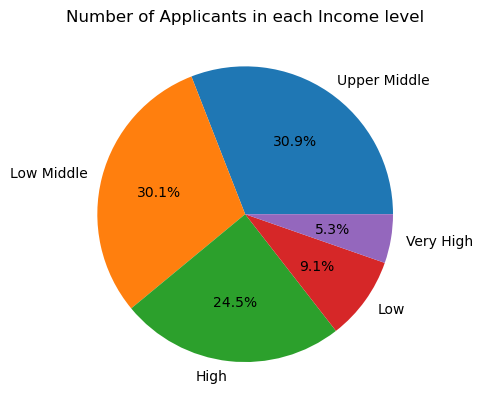

In [87]:
#plot a pie chart
plt.pie(income['count'], labels=income['Income levels'], autopct = '%1.1f%%')
plt.title('Number of Applicants in each Income level')
plt.show()

### Segment according to number of dependents

In [173]:
dependents = data['Dependent Levels'].value_counts().reset_index()
dependents = dependents.rename(columns={'index':'Dependent Levels', 'Dependent Levels': 'Number of Applicants'})

dependents.head()

,Number of Applicants,count
0,Medium,1435
1,High,1425
2,Low,1409


### Segment according to number of education

In [ ]:
#plot a pie chart
plt.pie(education['count'], labels=income['Income levels'], autopct = '%1.1f%%')
plt.title('Number of Applicants in each Income level')
plt.show()

### Segment according to number of employement

In [107]:
employement = data['self_employed'].value_counts().reset_index()
employement = employement.rename(columns={'index':'Self employement', 'self_employed': 'Number of Applicants'})
employement.head()

,Number of Applicants,count
0,Yes,2150
1,No,2119


### Loan Approval Rate

In [109]:
# General Loan Approval rate
loans = data['loan_status'].value_counts().reset_index()
loans = loans.rename(columns={'index':'Loan Status','loan_status':'Total'})
loans.head()

,Total,count
0,Approved,2656
1,Rejected,1613


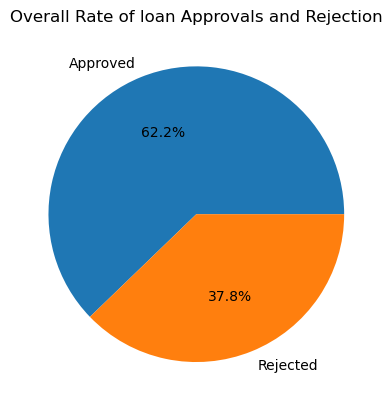

In [113]:
plt.pie(loans['count'], labels=loans['Total'], autopct='%1.1f%%')
plt.title('Overall Rate of loan Approvals and Rejection')
plt.show()

### Loan Approval according to level to education

In [114]:
#Group data by education and loan status
education = data.groupby(['education','loan_status']).size().reset_index()

#filter to include approved and rejected
education = education[education["loan_status"].isin(['Approved','Rejected'])]

education.head()

,education,loan_status,0
0,Graduate,Approved,1339
1,Graduate,Rejected,805
2,Not Graduate,Approved,1317
3,Not Graduate,Rejected,808


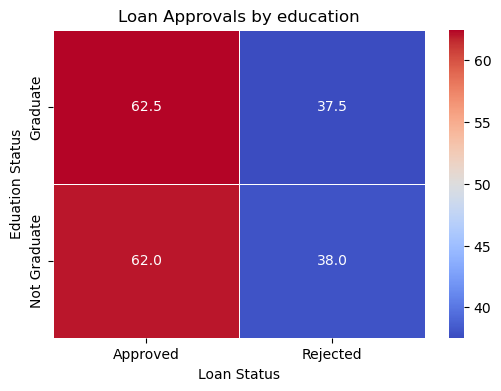

In [116]:
# Create a pivot table
pivot_table = education.pivot(index='education', columns='loan_status', values=0)
row_totals = pivot_table.sum(axis=1)
percentage = pivot_table.div(row_totals, axis=0) * 100 # to convert fractions to percentage

#Create a heatmap
plt.figure(figsize=(6,4))
sns.heatmap(percentage, annot=True, fmt='.1f', cmap='coolwarm', linewidth=0.5)
plt.title("Loan Approvals by education")
plt.xlabel("Loan Status")
plt.ylabel("Eduation Status")
plt.show()


### Loan Approval according to Type of employment

In [122]:
#Group data by education and loan status
employment_type = data.groupby(['self_employed','loan_status']).size().reset_index()

#filter to include approved and rejected
employment_type = employment_type[employment_type["loan_status"].isin(['Approved','Rejected'])]
employment_type = employment_type.rename(columns={0:'Total'})
employment_type.head()

,self_employed,loan_status,Total
0,No,Approved,1318
1,No,Rejected,801
2,Yes,Approved,1338
3,Yes,Rejected,812


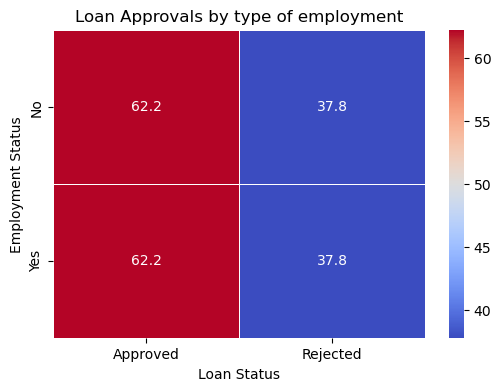

In [125]:
# Create a pivot table
pivot_table = employment_type.pivot(index='self_employed', columns='loan_status', values='Total')
row_totals = pivot_table.sum(axis=1)
percentage = pivot_table.div(row_totals, axis=0) * 100 # to convert fractions to percentage

#Create a heatmap
plt.figure(figsize=(6,4))
sns.heatmap(percentage, annot=True, fmt='.1f', cmap='coolwarm', linewidth=0.5)
plt.title("Loan Approvals by type of employment")
plt.xlabel("Loan Status")
plt.ylabel("Employment Status")
plt.show()


### Loan approval rate by CIBIL rating

In [128]:
#Grouping Data according to Cibil rating and loans status and count for each combination
cibil_rates = data.groupby(['CIBIL Rating', 'loan_status']).size().reset_index()
cibil_rates = cibil_rates.rename(columns={0 :'Total'})
cibil_rates

,CIBIL Rating,loan_status,Total
0,Average,Approved,681
1,Average,Rejected,2
2,Excellent,Approved,1050
3,Excellent,Rejected,6
4,Good,Approved,740
5,Good,Rejected,5
6,Poor,Approved,185
7,Poor,Rejected,1600


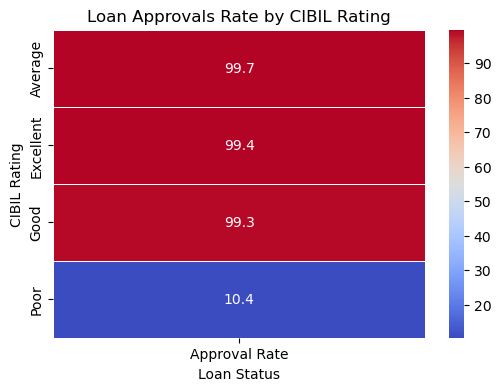

In [129]:
pivot_table = cibil_rates.pivot(index='CIBIL Rating', columns='loan_status', values='Total')


#Calculate Approval Rates
pivot_table['Approval Rate'] = pivot_table['Approved'] / (pivot_table['Approved'] + pivot_table['Rejected']) * 100


#Create a heatmap
plt.figure(figsize=(6,4))
sns.heatmap(pivot_table[['Approval Rate']], annot=True, fmt='.1f', cmap='coolwarm', linewidth=0.5)
plt.title("Loan Approvals Rate by CIBIL Rating")
plt.xlabel("Loan Status")
plt.ylabel("CIBIL Rating")
plt.show()


### Correlation Analysis 

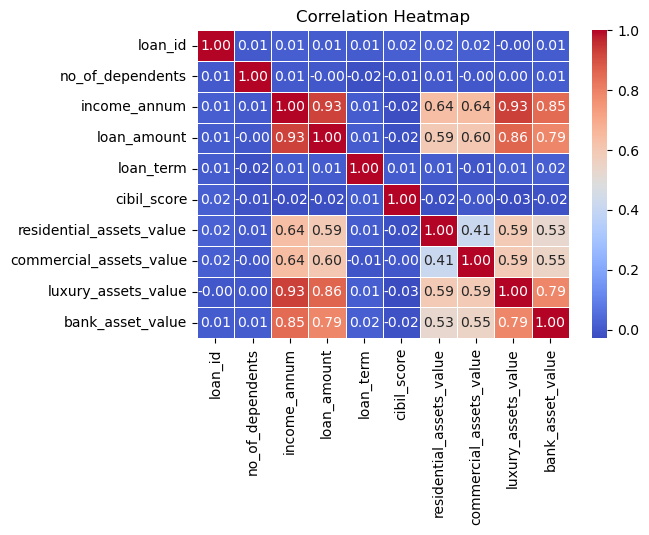

In [133]:
correlation_matrix = data.corr(numeric_only=True) #Only select numeric columns

#Create Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidth=0.5)
plt.title("Correlation Heatmap")

#plt.xlabel("Loan Status")
#plt.ylabel("Employment Status")

plt.show()

### Boxplot to represent Correlation between income and loan amount

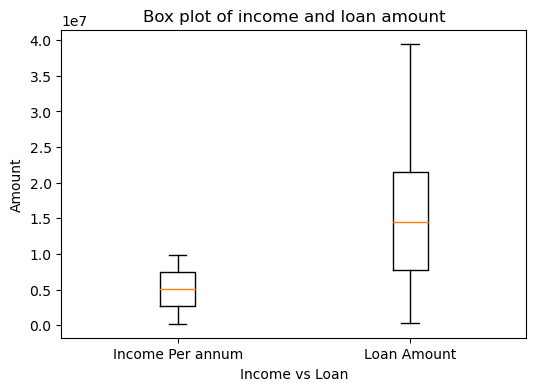

In [138]:
income = data['income_annum']
loan = data['loan_amount']

#Create the figure
plt.figure(figsize=(6,4))
ax = plt.axes()

ax.boxplot([income, loan], labels=["Income Per annum", "Loan Amount"])
plt.title("Box plot of income and loan amount")
plt.xlabel("Income vs Loan")
plt.ylabel("Amount")

plt.show()

There is a statistical significant difference in loan amount and income per annum

### Correlation between income and loan amount

In [168]:
from scipy import stats
from scipy.stats import ttest_ind #ttest
from scipy.stats import chi2_contingency #for chi-square test
from scipy.stats import f_oneway #For Anova

In [156]:
#Conduct a T_Test

In [157]:
income = data['income_annum']
loan = data['loan_amount']

t_stat, p_value = ttest_ind(income, loan, equal_var=True)

print('The T-statistics:' ,t_stat)
print('The p value is:',p_value)

if p_value < 0.05:
    print('There is a statistical significant difference in loan amount and income per annum')
else:
    print('There is no statistical significant difference in loan amount and income per annum')

The T-statistics: -69.51489699866843
The p value is: 0.0
There is a statistical significant difference in loan amount and income per annum


### Chi-Square Analysis: Determine correlation between loan status and number of dependents

In [158]:
#Create a contingency table
contingency_table = pd.crosstab(data["loan_status"],data["Dependent Levels"]) #Cross tabulate the loan_status and Dependent Levels columns

#Perform chi-square
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table) #take contingency_table as input and retuen chi-square stats,p-vlaue, degree of freedom

print("Chi-Square test statistic:",chi2)
print("The p-value is:",p_value)
print("The degree of freedom is:",dof)


if p_value < 0.05:
    print('There is a statistical significant difference in loan status and inumber of dependents')
else:
    print('There is no statistical significant difference in loan status and number of dependents')


Chi-Square test statistic: 1.1296798036848839
The p-value is: 0.5684511474541935
The degree of freedom is: 2
There is no statistical significant difference in loan status and number of dependents


### Asset value impact on loan approval

In [159]:
#Check if there is a relation between asset value and getting a loan approval

In [165]:
#Split the data into two groups based on loan status
approved = data[data['loan_status'] == "Approved"]
rejected = data[data['loan_status'] == "Rejected"]

#Pereform a t-test

assets = ['residential_assets_value', 'commercial_assets_value', 'luxury_assets_value','bank_asset_value'] #Column names

for columns in assets:
    t_stat, p_value = ttest_ind(approved[columns], rejected[columns], equal_var=False)
    print("\nT-Test for:",columns)
    print(" T-statistic:",t_stat)
    print(" P-Value:",p_value)
    
    #95% confidence levels
    if p_value < 0.05:
        print(' The difference in',columns,'between approved and rejected loans statistically significant')
    else:
        print(' The difference in',columns,'between approved and rejected loans is not statistically significant')
        #There isn't enought evidence to conclude that any type of assets significantly deterimines if a loan gets approved or rejected


T-Test for: residential_assets_value
 T-statistic: -0.9399394365500209
 P-Value: 0.34731539500224484
 The difference in residential_assets_value between approved and rejected loans is not statistically significant

T-Test for: commercial_assets_value
 T-statistic: 0.5387741456120381
 P-Value: 0.5900779272018964
 The difference in commercial_assets_value between approved and rejected loans is not statistically significant

T-Test for: luxury_assets_value
 T-statistic: -1.013970039592796
 P-Value: 0.3106683217824068
 The difference in luxury_assets_value between approved and rejected loans is not statistically significant

T-Test for: bank_asset_value
 T-statistic: -0.4448616890142232
 P-Value: 0.6564475917396153
 The difference in bank_asset_value between approved and rejected loans is not statistically significant


### Using ANOVA to determine a correlation between income and asset value

In [170]:
#Extracting values in a column

residential_assets_value = data['residential_assets_value']
commercial_assets_value = data['commercial_assets_value']
luxury_assets_value = data['luxury_assets_value']
bank_asset_value = data['bank_asset_value']
income = data['income_annum']

#Perform ANOVA
f_statistic, p_value = f_oneway(residential_assets_value, commercial_assets_value,luxury_assets_value,bank_asset_value,income)

print("The f-statistic is:", f_statistic)
print("The p-Value is:", p_value)

if p_value < 0.05:
    #There is no relation between between assets and income
    print('There is a significant influence of asset value on income per annum')
else:
    #There exists a relation between between assets and income
    print('There is no significant influence of asset value on income per annum')

The f-statistic is: 2518.654468935116
The p-Value is: 0.0
There is a significant influence of asset value on income per annum
